In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("heart.csv")

In [6]:
print(df)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

In [5]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [18]:
cat_col = ["sex","cp","fbs","restecg","exang","slope","ca","thal"]
con_col = ["age","trestbps","chol","thalach","oldpeak"]
target_col = ["target"]

     target
0         1
1         1
2         1
3         1
4         1
..      ...
298       0
299       0
300       0
301       0
302       0

[303 rows x 1 columns]


In [15]:
df["thal"].unique()

array([1, 2, 3, 0], dtype=int64)

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score , classification_report,roc_curve
from sklearn.metrics import confusion_matrix

df_onehot = pd.get_dummies(df,columns=cat_col,drop_first=True)
print(df_onehot)

     age  trestbps  chol  thalach  oldpeak  target  sex_1  cp_1  cp_2  cp_3  \
0     63       145   233      150      2.3       1      1     0     0     1   
1     37       130   250      187      3.5       1      1     0     1     0   
2     41       130   204      172      1.4       1      0     1     0     0   
3     56       120   236      178      0.8       1      1     1     0     0   
4     57       120   354      163      0.6       1      0     0     0     0   
..   ...       ...   ...      ...      ...     ...    ...   ...   ...   ...   
298   57       140   241      123      0.2       0      0     0     0     0   
299   45       110   264      132      1.2       0      1     0     0     1   
300   68       144   193      141      3.4       0      1     0     0     0   
301   57       130   131      115      1.2       0      1     0     0     0   
302   57       130   236      174      0.0       0      0     1     0     0   

     ...  exang_1  slope_1  slope_2  ca_1  ca_2  ca

In [43]:
lr = LogisticRegression()
x = df_onehot.drop(["target"],axis=1)
y=df[["target"]]
print(type(y))
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.2,random_state=42)

<class 'pandas.core.frame.DataFrame'>


In [64]:
x

,age,trestbps,chol,thalach,oldpeak,sex_1,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,63,145,233,150,2.3,1,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,56,120,236,178,0.8,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,123,0.2,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,1
299,45,110,264,132,1.2,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,141,3.4,1,0,0,0,1,...,0,1,0,0,1,0,0,0,0,1
301,57,130,131,115,1.2,1,0,0,0,0,...,1,1,0,1,0,0,0,0,0,1


In [38]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(242, 22)
(242,)
(61, 22)
(61,)


In [57]:
lr.fit(train_x,train_y)
pred_proba = lr.predict_proba(test_x)

pred = np.argmax(pred_proba,axis=1)
print(pred.shape)


(61,)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:

print(accuracy_score(train_y,lr.predict(train_x)))
print(accuracy_score(test_y,pred))

0.8553719008264463
0.8852459016393442


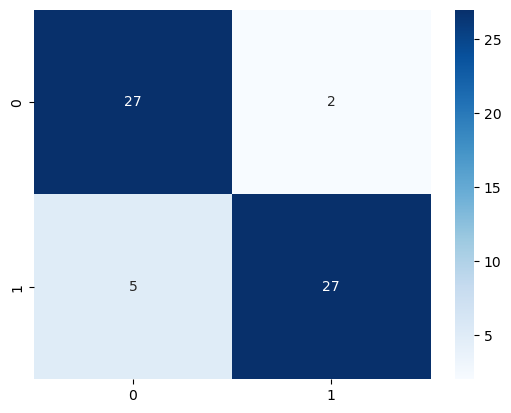

In [63]:
cm = confusion_matrix(test_y,pred)
sns.heatmap(cm,annot=True,cmap="Blues")
plt.show()